<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [8]:
import pandas as pd
df = pd.read_csv('data/blog_casciari.csv')

In [9]:
df.shape

(520, 3)

In [10]:
df.head()

,titulo,fecha,cuento
0,El rincón blanco,1/11/08,De pronto yo estaba en el hogar donde pasé la ...
1,Mínimos avances en la cama,1/24/08,"Menos la cama, todo ha mejorado en este mundo...."
2,Don Marcos,2/19/08,"Dos veces, y no una, mi abuelo materno me ayud..."
3,Los dos rulfos,3/26/08,"A su regreso de México, mi amigo Comequechu no..."
4,La noticia no es el perro,4/15/08,"De repente, un video de You Tube recibe un mil..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titulo  520 non-null    object
 1   fecha   520 non-null    object
 2   cuento  520 non-null    object
dtypes: object(3)
memory usage: 12.3+ KB


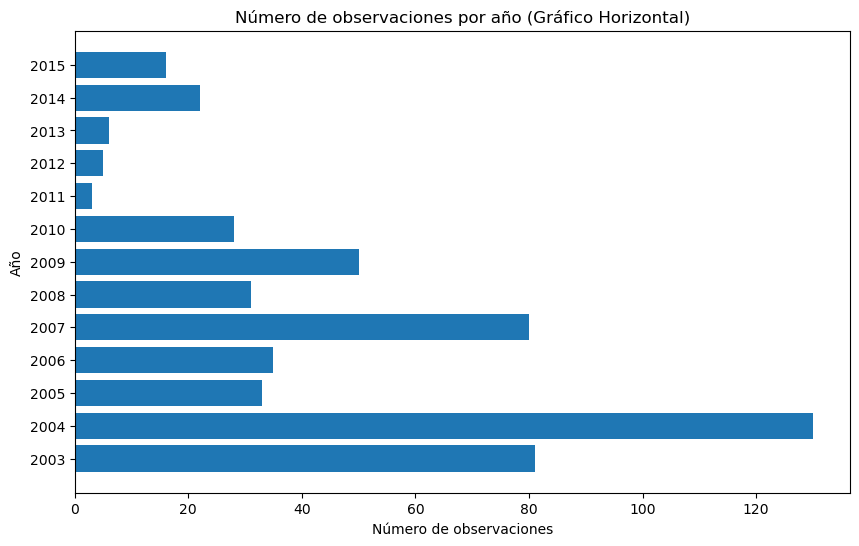

520


In [15]:
import matplotlib.pyplot as plt

df['fecha'] = pd.to_datetime(df['fecha'], format='%m/%d/%y')
df['año'] = df['fecha'].dt.year
conteo_por_año = df['año'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.barh(conteo_por_año.index, conteo_por_año.values)
plt.xlabel('Número de observaciones')
plt.ylabel('Año')
plt.title('Número de observaciones por año (Gráfico Horizontal)')

plt.yticks(conteo_por_año.index)

plt.show()
print(len(df['titulo'].unique()))

Para comenzar, se almacenan los datos del blog en un data frame de pandas llamado df a través de la función read_csv. A continuación se verifican las dimensiones del data frame, de donde se obtienen 520 filas y 3 columnas. Es decir que el blog contiene 520 cuentos. A través de head se ven las primeras observaciones y con info se verifica que no hay valores nulos en la base de datos. También se hace un gráfico para verificar el año de escritura de los cuentos. Acá se concluye que el año en el que más cuentos se escribieron en el blog fue en 2004.

### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

Para comenzar, se mostrará el paso a paso con el cuento "La venganza del metegol" y a continuación se realizará todo el procedimiento a partir de una sola función para todos los cuentos. En primer lugar, se verifica la posición en la que se encuentra este cuento. De este modo, se verifica que se encuentra en la fila 160.

In [16]:
df[df['titulo'] == "La venganza del metegol"]

,titulo,fecha,cuento,año
160,La venganza del metegol,2015-11-17,El mes pasado me invitaron a presentar un libr...,2015


Con esta información, se genera un objeto llamado metegol que contiene el cuento solicitado y se muestra su texto.

In [17]:
metegol = df['cuento'][160]
metegol

'El mes pasado me invitaron a presentar un libro en Buenos Aires. Y como era un libro sobre fútbol, al final de la charla el director de la editorial nos invitó a jugar un partido de metegol (ese invento español al que sus creadores llaman, erróneamente, futbolín). Hacía años que no jugaba al metegol, pero por suerte me tocó de compañero un filósofo muy prestigioso y pudimos ganar. Nuestros contrincantes eran el autor del libro y el director de la editorial. De los tres, a este último lo conocía desde la juventud.\nJugamos dos partidos enteros y los destrozamos con una facilidad pasmosa: hacía años que no practicaba este falso deporte de muñecas y reflejos, pero descubrí que no había perdido las mañas. Eso me hizo sentir bien: a mi edad cualquier destreza que mantengamos indemne, por más pelotuda que sea, se convierte en una gran noticia.\nDespués de la charla algunos fotógrafos hicieron imágenes del partido de metegol y las subieron a Twitter.\n— Estadio: Librería Gandhi, Buenos Aires

Se importan las librerías re para el tratamiento de las expresiones regulares y unidecode para eliminar caracteres no deseados transformando el texto en ASCII a través de la función unidecode. A continuación se muestran los primeros 1000 caracteres del texto, donde se verifica que se eliminaron tildes y virgulillas.

In [18]:
import re
import unidecode

metegol = unidecode.unidecode(metegol)
metegol[0:1000]

'El mes pasado me invitaron a presentar un libro en Buenos Aires. Y como era un libro sobre futbol, al final de la charla el director de la editorial nos invito a jugar un partido de metegol (ese invento espanol al que sus creadores llaman, erroneamente, futbolin). Hacia anos que no jugaba al metegol, pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar. Nuestros contrincantes eran el autor del libro y el director de la editorial. De los tres, a este ultimo lo conocia desde la juventud.\nJugamos dos partidos enteros y los destrozamos con una facilidad pasmosa: hacia anos que no practicaba este falso deporte de munecas y reflejos, pero descubri que no habia perdido las manas. Eso me hizo sentir bien: a mi edad cualquier destreza que mantengamos indemne, por mas pelotuda que sea, se convierte en una gran noticia.\nDespues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a Twitter.\n-- Estadio: Libreria Gandhi, Buenos Aire

Con la función sub se trabajan las expresiones regulares. ^\w\s es una clase de caracteres negada que busca cualquier carácter que no sea una letra o un dígito (\w) ni un espacio en blanco (\s). En otras palabras, busca cualquier carácter que no sea una letra, un dígito o un espacio en blanco. El símbolo | actúa como un operador OR, lo que significa que estamos buscando cualquier carácter que coincida con el patrón anterior (cualquier carácter que no sea una letra, un dígito o un espacio en blanco) o el siguiente patrón. \n representa el carácter de nueva línea en una cadena de texto. Todos estos patrones se reemplazan por espacios en blanco.

In [19]:
metegol = re.sub("[^\\w\\s]|\n", ' ', metegol)
print(metegol[0:1000])

El mes pasado me invitaron a presentar un libro en Buenos Aires  Y como era un libro sobre futbol  al final de la charla el director de la editorial nos invito a jugar un partido de metegol  ese invento espanol al que sus creadores llaman  erroneamente  futbolin   Hacia anos que no jugaba al metegol  pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar  Nuestros contrincantes eran el autor del libro y el director de la editorial  De los tres  a este ultimo lo conocia desde la juventud  Jugamos dos partidos enteros y los destrozamos con una facilidad pasmosa  hacia anos que no practicaba este falso deporte de munecas y reflejos  pero descubri que no habia perdido las manas  Eso me hizo sentir bien  a mi edad cualquier destreza que mantengamos indemne  por mas pelotuda que sea  se convierte en una gran noticia  Despues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a Twitter     Estadio  Libreria Gandhi  Buenos Aires  L

En el código que se muestra a continuación se eliminan los dígitos del texto por espacios en blanco.

In [20]:
metegol = re.sub("\d+", "", metegol)
print(metegol[0:1000])

El mes pasado me invitaron a presentar un libro en Buenos Aires  Y como era un libro sobre futbol  al final de la charla el director de la editorial nos invito a jugar un partido de metegol  ese invento espanol al que sus creadores llaman  erroneamente  futbolin   Hacia anos que no jugaba al metegol  pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar  Nuestros contrincantes eran el autor del libro y el director de la editorial  De los tres  a este ultimo lo conocia desde la juventud  Jugamos dos partidos enteros y los destrozamos con una facilidad pasmosa  hacia anos que no practicaba este falso deporte de munecas y reflejos  pero descubri que no habia perdido las manas  Eso me hizo sentir bien  a mi edad cualquier destreza que mantengamos indemne  por mas pelotuda que sea  se convierte en una gran noticia  Despues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a Twitter     Estadio  Libreria Gandhi  Buenos Aires  L

A continuación, se eliminan los espacios extra:

In [21]:
metegol = re.sub('\s+', ' ', metegol)
print(metegol[0:1000])

El mes pasado me invitaron a presentar un libro en Buenos Aires Y como era un libro sobre futbol al final de la charla el director de la editorial nos invito a jugar un partido de metegol ese invento espanol al que sus creadores llaman erroneamente futbolin Hacia anos que no jugaba al metegol pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar Nuestros contrincantes eran el autor del libro y el director de la editorial De los tres a este ultimo lo conocia desde la juventud Jugamos dos partidos enteros y los destrozamos con una facilidad pasmosa hacia anos que no practicaba este falso deporte de munecas y reflejos pero descubri que no habia perdido las manas Eso me hizo sentir bien a mi edad cualquier destreza que mantengamos indemne por mas pelotuda que sea se convierte en una gran noticia Despues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a Twitter Estadio Libreria Gandhi Buenos Aires Locales A la izquierda Alej

Y se pasa todo el texto a minúsculas:

In [22]:
metegol =  metegol.lower()
print(metegol[0:1000])

el mes pasado me invitaron a presentar un libro en buenos aires y como era un libro sobre futbol al final de la charla el director de la editorial nos invito a jugar un partido de metegol ese invento espanol al que sus creadores llaman erroneamente futbolin hacia anos que no jugaba al metegol pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar nuestros contrincantes eran el autor del libro y el director de la editorial de los tres a este ultimo lo conocia desde la juventud jugamos dos partidos enteros y los destrozamos con una facilidad pasmosa hacia anos que no practicaba este falso deporte de munecas y reflejos pero descubri que no habia perdido las manas eso me hizo sentir bien a mi edad cualquier destreza que mantengamos indemne por mas pelotuda que sea se convierte en una gran noticia despues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a twitter estadio libreria gandhi buenos aires locales a la izquierda alej

A continuación se importa spacy, que es una librería que será usada para la lematización y la tokenización. La línea de código nlp = spacy.load("es_core_news_sm") se utiliza para cargar un modelo de procesamiento de lenguaje natural (NLP) pre-entrenado para el español. El modelo es guardado en el objeto nlp.

In [23]:
import spacy
nlp = spacy.load("es_core_news_sm")

Este modelo pre entrenado es aplicado al cuento elegido previamente:

In [24]:
metegol = nlp(metegol)
print(metegol[0:1000])

el mes pasado me invitaron a presentar un libro en buenos aires y como era un libro sobre futbol al final de la charla el director de la editorial nos invito a jugar un partido de metegol ese invento espanol al que sus creadores llaman erroneamente futbolin hacia anos que no jugaba al metegol pero por suerte me toco de companero un filosofo muy prestigioso y pudimos ganar nuestros contrincantes eran el autor del libro y el director de la editorial de los tres a este ultimo lo conocia desde la juventud jugamos dos partidos enteros y los destrozamos con una facilidad pasmosa hacia anos que no practicaba este falso deporte de munecas y reflejos pero descubri que no habia perdido las manas eso me hizo sentir bien a mi edad cualquier destreza que mantengamos indemne por mas pelotuda que sea se convierte en una gran noticia despues de la charla algunos fotografos hicieron imagenes del partido de metegol y las subieron a twitter estadio libreria gandhi buenos aires locales a la izquierda alej

Para eliminar los stopwords se usan los suministrados por el equipo docente para este ejercicio, añadiéndolas a las stopwords predefinidas en el modelo cargado previamente. Estas están contenidas en extra_stopwords y stopwords_taller.

In [26]:
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

In [27]:
stopwords_taller = pd.read_csv('data/stopwords_taller.csv', sep=',',header=None)
stopwords_taller.columns = ['stopwords']
stopwords_taller=set(stopwords_taller['stopwords'].to_list())

In [28]:
nlp.Defaults.stop_words |= extra_stopwords
nlp.Defaults.stop_words |= stopwords_taller

Así, se conservan solamente las palabras que no están en la lista de stopwords. De aquí se evidencia que se elimina la palabra "Buenos" que quizás convendría conservar debido a que en la literatura hispanoamericana es muy habitual que en la narrativa, el espacio geográfico sea protagónico, por lo cual las ciudades podrían incluirse en los sistemas de recomendación y la eliminación de esta palabra excluye "Buenos Aires".

In [29]:
metegol = [token.text for token in metegol if not token.is_stop]
metegol = " ".join(metegol)
print(metegol[0:1000])

mes invitaron presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creadores llaman erroneamente futbolin anos jugaba metegol suerte toco companero filosofo prestigioso pudimos ganar contrincantes autor libro director editorial conocia juventud jugamos partidos enteros destrozamos facilidad pasmosa anos practicaba falso deporte munecas reflejos descubri perdido manas sentir edad destreza mantengamos indemne pelotuda convierte noticia charla fotografos imagenes partido metegol subieron twitter estadio libreria gandhi aires locales izquierda alejandro duchini gonzalo garces vistantes derecha tomas abraham hernan casciari resultado match match paliza volvi casa recibi mail chiri amigo infancia decia visto fotos sorprendia companero filosofo admirabamos juventud vos jugando metegol tomas abraham pasar sueno decia momento partido imagine diecisiete anos mirando ventana libreria gandhi escena futuro sonrei recuerdo momentaneo desconcentro 

A continuación, se realiza la lematización. En esta, se observa que hay algunas palabras que no se lematizan correctamente. Por ejemplo, charla se convierte en char él.

In [30]:
lemmas =[token.lemma_ for token in nlp(metegol)]

metegol = " ".join(lemmas)
print(metegol[0:1000])

mes invitar presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creador llamar erroneamente futbolin ano jugar metegol suerte tocar companero filosofo prestigioso poder ganar contrincante autor libro director editorial conocio juventud jugamos partido entero destrozamos facilidad pasmós ano practicar falso deporte muneca reflejo descubri perdido mana sentir edad destreza mantengamos indemne pelotuda convertir noticia char él fotografo imagen partido metegol subir twitter estadio librerio gandhi air local izquierda alejandro duchini gonzalo garz vistant derecho toma abraham hernar casciari resultado match match palizo volvi casa recibi mail chiri amigo infancia decio visto foto sorprendia companero filosofo admirabar juventud vo jugar metegol toma abraham pasar sueno decia momento partido imaginar diecisiete ano mirar ventana librerio gandhi escenar futuro sonrei recuerdo momentaneo desconcentro juego justo momento gol unico recibi n

Debido a que muchas veces se ha observado que, en la lematización se genera el término "él", se elimina este del texto:

In [31]:
metegol = re.sub('él', '', metegol)
print(metegol[0:1000])

mes invitar presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creador llamar erroneamente futbolin ano jugar metegol suerte tocar companero filosofo prestigioso poder ganar contrincante autor libro director editorial conocio juventud jugamos partido entero destrozamos facilidad pasmós ano practicar falso deporte muneca reflejo descubri perdido mana sentir edad destreza mantengamos indemne pelotuda convertir noticia char  fotografo imagen partido metegol subir twitter estadio librerio gandhi air local izquierda alejandro duchini gonzalo garz vistant derecho toma abraham hernar casciari resultado match match palizo volvi casa recibi mail chiri amigo infancia decio visto foto sorprendia companero filosofo admirabar juventud vo jugar metegol toma abraham pasar sueno decia momento partido imaginar diecisiete ano mirar ventana librerio gandhi escenar futuro sonrei recuerdo momentaneo desconcentro juego justo momento gol unico recibi noc

Se genera entonces una lista de palabras, pero solamente aquellas palabras con más de 2 caracteres:

In [32]:
metegol = [token.text for token in nlp(metegol) if len(token) > 2]
print(metegol[0:1000])

['mes', 'invitar', 'presentar', 'libro', 'aires', 'libro', 'futbol', 'charla', 'director', 'editorial', 'invito', 'jugar', 'partido', 'metegol', 'invento', 'espanol', 'creador', 'llamar', 'erroneamente', 'futbolin', 'ano', 'jugar', 'metegol', 'suerte', 'tocar', 'companero', 'filosofo', 'prestigioso', 'poder', 'ganar', 'contrincante', 'autor', 'libro', 'director', 'editorial', 'conocio', 'juventud', 'jugamos', 'partido', 'entero', 'destrozamos', 'facilidad', 'pasmós', 'ano', 'practicar', 'falso', 'deporte', 'muneca', 'reflejo', 'descubri', 'perdido', 'mana', 'sentir', 'edad', 'destreza', 'mantengamos', 'indemne', 'pelotuda', 'convertir', 'noticia', 'char', 'fotografo', 'imagen', 'partido', 'metegol', 'subir', 'twitter', 'estadio', 'librerio', 'gandhi', 'air', 'local', 'izquierda', 'alejandro', 'duchini', 'gonzalo', 'garz', 'vistant', 'derecho', 'toma', 'abraham', 'hernar', 'casciari', 'resultado', 'match', 'match', 'palizo', 'volvi', 'casa', 'recibi', 'mail', 'chiri', 'amigo', 'infancia

Todos estos procedimientos se resumen en una función, dejando la aclaración que esta función asume que previamente se han agregado las stop_words suministradas:

In [33]:
#extra_stopwords = pd.read_csv('extra_stopwords.csv', sep=',',header=None)
#extra_stopwords.columns = ['stopwords']
#extra_stopwords=set(extra_stopwords['stopwords'].to_list())
#stopwords_taller = pd.read_csv('stopwords_taller.csv', sep=',',header=None)
#stopwords_taller.columns = ['stopwords']
#stopwords_taller=set(stopwords_taller['stopwords'].to_list())
#nlp.Defaults.stop_words |= extra_stopwords
#nlp.Defaults.stop_words |= stopwords_taller
def text_cleaning(txt):
    
    # Eliminar caracteres especiales
    out = unidecode.unidecode(txt)
    out = re.sub("[^\\w\\s]|\n", ' ', out)
    out = re.sub("\d+", "", out)
    out = re.sub('\s+', ' ', out)
    # Poner en minúsculas
    out = out.lower()
    #NLP object
    out = nlp(out)
    # Eliminar Stopwords
    out = [token.text for token in out if not token.is_stop]
    out = " ".join(out)
    # Obtener los lemas de cada palabra
    lemmas =[token.lemma_ for token in nlp(out)]
    # Convertir la lista de lemmas nuevamente a texto
    out = " ".join(lemmas)
    # Remover "él"
    out = re.sub('él', '', out)
    # Remover palabras muy cortas
    out = [token.text for token in nlp(out) if len(token) > 2]
    
    return out

La limpieza definida en esta función es aplicada a cada uno de los cuentos, que son almacenados ya limpios en una lista. Con esta se unen los tokens en un objeto llamado clean_sentences en donde cada línea es un cuento. La línea 160 muestra el cuento "La venganza del metegol" con todo el proceso de limpieza.

In [34]:
clean = list(map(text_cleaning, df['cuento']))

clean_sentences = [" ".join(i) for i in clean]

# Vemos la linea 160 limpia
print(clean_sentences[160])

mes invitar presentar libro aires libro futbol charla director editorial invito jugar partido metegol invento espanol creador llamar erroneamente futbolin ano jugar metegol suerte tocar companero filosofo prestigioso poder ganar contrincante autor libro director editorial conocio juventud jugamos partido entero destrozamos facilidad pasmós ano practicar falso deporte muneca reflejo descubri perdido mana sentir edad destreza mantengamos indemne pelotuda convertir noticia char fotografo imagen partido metegol subir twitter estadio librerio gandhi air local izquierda alejandro duchini gonzalo garz vistant derecho toma abraham hernar casciari resultado match match palizo volvi casa recibi mail chiri amigo infancia decio visto foto sorprendia companero filosofo admirabar juventud jugar metegol toma abraham pasar sueno decia momento partido imaginar diecisiete ano mirar ventana librerio gandhi escenar futuro sonrei recuerdo momentaneo desconcentro juego justo momento gol unico recibi noche d

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

Se importa CountVectorizer de sklearn y el modelo es guardado en un objeto llamado count. Este es aplicado a clean_sentences, de donde se genera una matriz con 520 filas y 24622 columnas (términos)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
count_matrix = count.fit_transform(clean_sentences)
count_matrix.shape

Esta matriz se convierte a un formato denso almacenado en un data frame denominado df_count que contiene el mismo número de filas y columnas que la matriz anterior.

In [ ]:
df_count = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names_out())
df_count.head()

A partir de esta función se identifican algunos términos que no fueron lematizados correctamente, por lo cual se crea la función Lematizador_propio para abandonar, abalanzar, zurdo, zurrar y zozobrar:

In [35]:
def Lematizador_propio(text):
    # Diccionario con las palabras y sus lemas correspondientes
    lemmas = {
        r"\babandona\b": "abandonar",
        r"\babandonado\b": "abandonar",
        r"\babandonandolo\b": "abandonar",
        r"\babandonar\b": "abandonar",
        r"\babandono\b": "abandonar",
        r"\babandón\b": "abandonar",
        r"\babalanzo\b": "abalanzar",
        r"\bzurda\b": "zurdo",
        r"\bzurdazo\b": "zurdo",
        r"\bzurdito\b": "zurdo",
        r"\bzurraba\b": "zurrar",
        r"\bzurrartir\b": "zurrar",
        r"\bzozobra\b": "zozobrar"
    }
    for pattern, lemma in lemmas.items():
        text = re.sub(pattern, lemma, text, flags=re.IGNORECASE)
    return text

clean_sentences2 = list(map(Lematizador_propio, clean_sentences))

Después de aplicar el nuevo lematizador, se aplica de nuevo el conteo de términos con CountVectorizer, disminuyendo el número de columnas.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(clean_sentences2)

df_count = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names_out())
df_count.head()

,aamir,abacaaado,abajo,abalanzar,abananado,abandonar,abanico,abaraja,abaratar,abarcar,...,zozobrar,zsab,zulu,zumbadisir,zumbar,zumbido,zumr,zurdo,zurrar,zón
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se importa linear_kernel con el fin de calcular la distancia de coseno en la matriz count_matrix

In [39]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(count_matrix, count_matrix)

Ahora, se define la función de recomendador donde se extraen los índices, se identifica el índice del cuento requerido por la función en la opción titulo y se extraen los puntajes de similitud de coseno aplicados a este cuento. En el paso 6 se extraen los primeros 5 cuentos con mayor puntaje en la similitud de coseno que fueron ordenados en el paso 5. No se incluye el elemento 0 de la lista debido a que este corresponde al mismo cuento solicitado en la función.La función retorna los títulos de los cuentos similares.

In [40]:
def recomendador(titulo, cosine_sim=cosine_sim, df=df):
    #Paso 2
    df = df.reset_index()
    indices = pd.Series(df.index, index=df['titulo']).drop_duplicates()
    #Paso 3
    idx = indices[titulo]

    #Paso 4
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Paso 5
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Paso 6
    sim_scores = sim_scores[1:6]

    cuento_indices = [i[0] for i in sim_scores]

    #Paso 7
    return df['titulo'].iloc[cuento_indices]

Se prueba la función y se obtienen los 5 cuentos recomendados.

In [41]:
recomendador("La venganza del metegol")

6            Ropa sucia
117       10.6 segundos
121       Gaussian blur
58          La revancha
120    Escupir el asado
Name: titulo, dtype: object

A través de una nube de palabras se obtienen los términos más usados en estos cuentos. De aquí se ve que los términos están relacionados con la visión y la fotografía. Aun así, hay algunas palabras muy repetidas que quizás no son tan informativos como por ejemplo año.

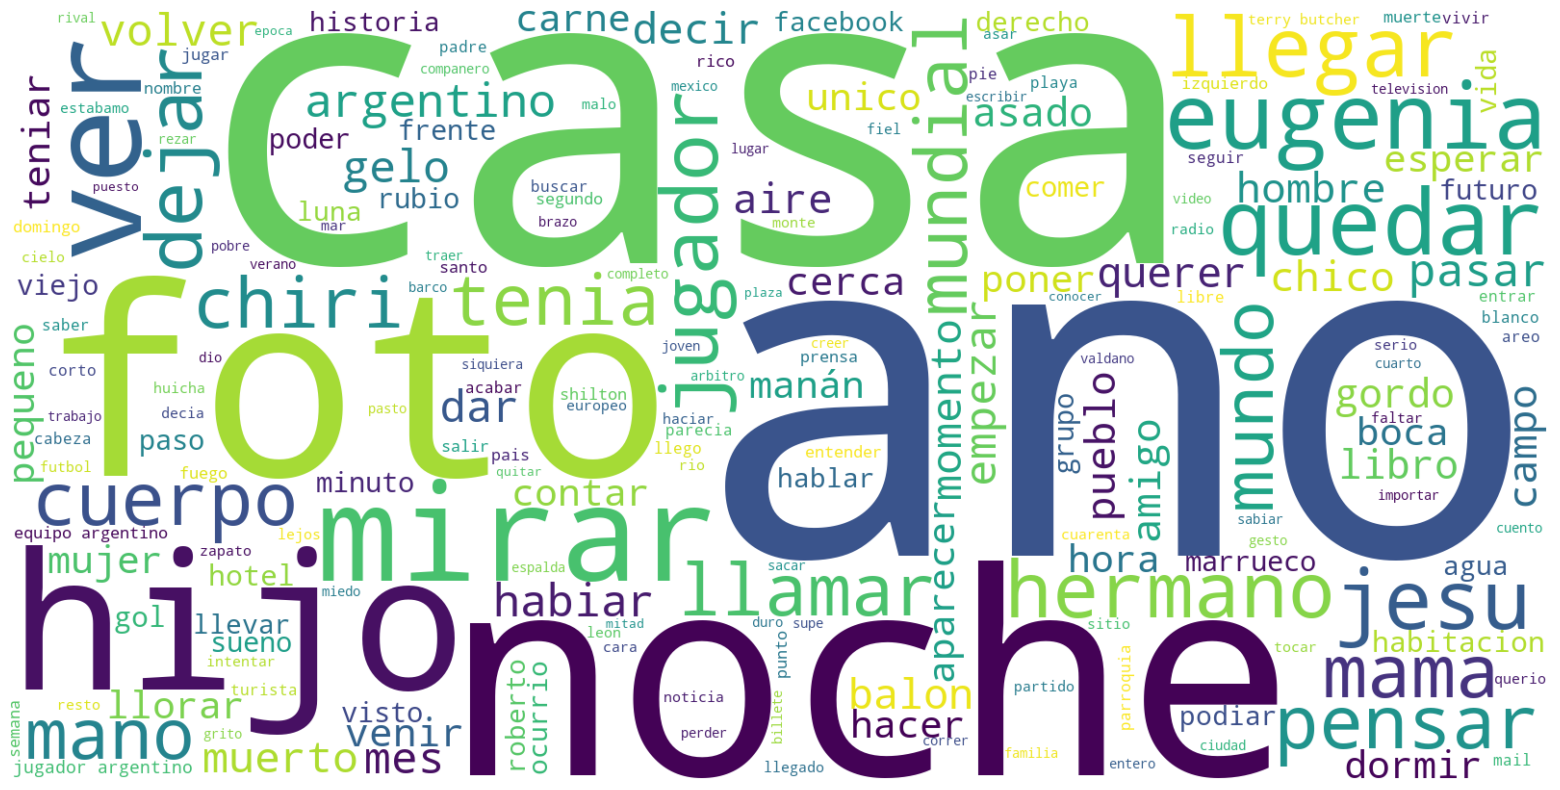

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cuentos_rec=df[df['titulo'].isin(recomendador("La venganza del metegol"))]

text = " ".join(cuentos_rec['cuento'])
text = text_cleaning(text)
text=' '.join(text)
text = Lematizador_propio(text)

wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

Se importa TfidfVectorizer de sklearn y el modelo es guardado en un objeto llamado tfidf. Este es aplicado a clean_sentences, de donde se genera una matriz con 520 filas y 24622 columnas (términos)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(clean_sentences)
tfidf_matrix.shape

(520, 24644)

Esta matriz se convierte a un formato denso almacenado en un data frame denominado df_count que contiene el mismo número de filas y columnas que la matriz anterior. La diferencia con el método CountVectorizer es que en este caso no se generan conteos sino puntajes.

In [44]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

df_tfidf.head()

,aamir,abacaaado,abajo,abalanzar,abalanzo,abananado,abandonado,abandonar,abandono,abandón,...,zumbido,zumr,zurda,zurdazo,zurdito,zurdo,zurraba,zurrar,zurrartir,zón
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.016384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se aplica el mismo lematizador realizado previamente:

In [45]:
def Lematizador_propio(text):
    # Diccionario con las palabras y sus lemas correspondientes
    lemmas = {
        r"\babandona\b": "abandonar",
        r"\babandonado\b": "abandonar",
        r"\babandonandolo\b": "abandonar",
        r"\babandonar\b": "abandonar",
        r"\babandono\b": "abandonar",
        r"\babandón\b": "abandonar",
        r"\babalanzo\b": "abalanzar",
        r"\bzurda\b": "zurdo",
        r"\bzurdazo\b": "zurdo",
        r"\bzurdito\b": "zurdo",
        r"\bzurraba\b": "zurrar",
        r"\bzurrartir\b": "zurrar",
        r"\bzozobra\b": "zozobrar"
    }
    for pattern, lemma in lemmas.items():
        text = re.sub(pattern, lemma, text, flags=re.IGNORECASE)
    return text

clean_sentences2 = list(map(Lematizador_propio, clean_sentences))

Y una vez definido el nuevo lematizador se vuelve a implementar TfidfVectorizer:

In [46]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(clean_sentences2)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf.head()

,aamir,abacaaado,abajo,abalanzar,abananado,abandonar,abanico,abaraja,abaratar,abarcar,...,zozobrar,zsab,zulu,zumbadisir,zumbar,zumbido,zumr,zurdo,zurrar,zón
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.016384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se calcula la distancia de coseno que se guarda en el objeto cosine_sim2 sobre la matriz calculada por TfidfVectorizer:

In [47]:
cosine_sim2 = linear_kernel(tfidf_matrix, tfidf_matrix)

Para aplicar el recomendador usando la matriz calculada por TfidfVectorizer. Para esto se modifica la opción cosine_sim por cosine_sim2 que contiene las distancias coseno calculadas en la matriz TfidfVectorizer. La ordenación fue realizada dentro de la función recomendador. En la línea sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) se ordenan los puntajes calculados y en la línea sim_scores = sim_scores[1:6] se extraen los primeros 6. El único cuento que coincide en ambos métodos es el cuento "Gaussian blur"

In [48]:
recomendador("La venganza del metegol", cosine_sim = cosine_sim2)

389    Una línea de puntos en un libro de catecismo
17                    Cuento con bruja y tramontina
113                       Los jefes y los empleados
140                      La estrategia del banderín
14                     Dice el Chiri, dice el Gordo
Name: titulo, dtype: object

A pesar de que los cuentos recomendados fueron diferentes en su mayoría, los términos más repetidos son muy similares a los obtenidos previamente:

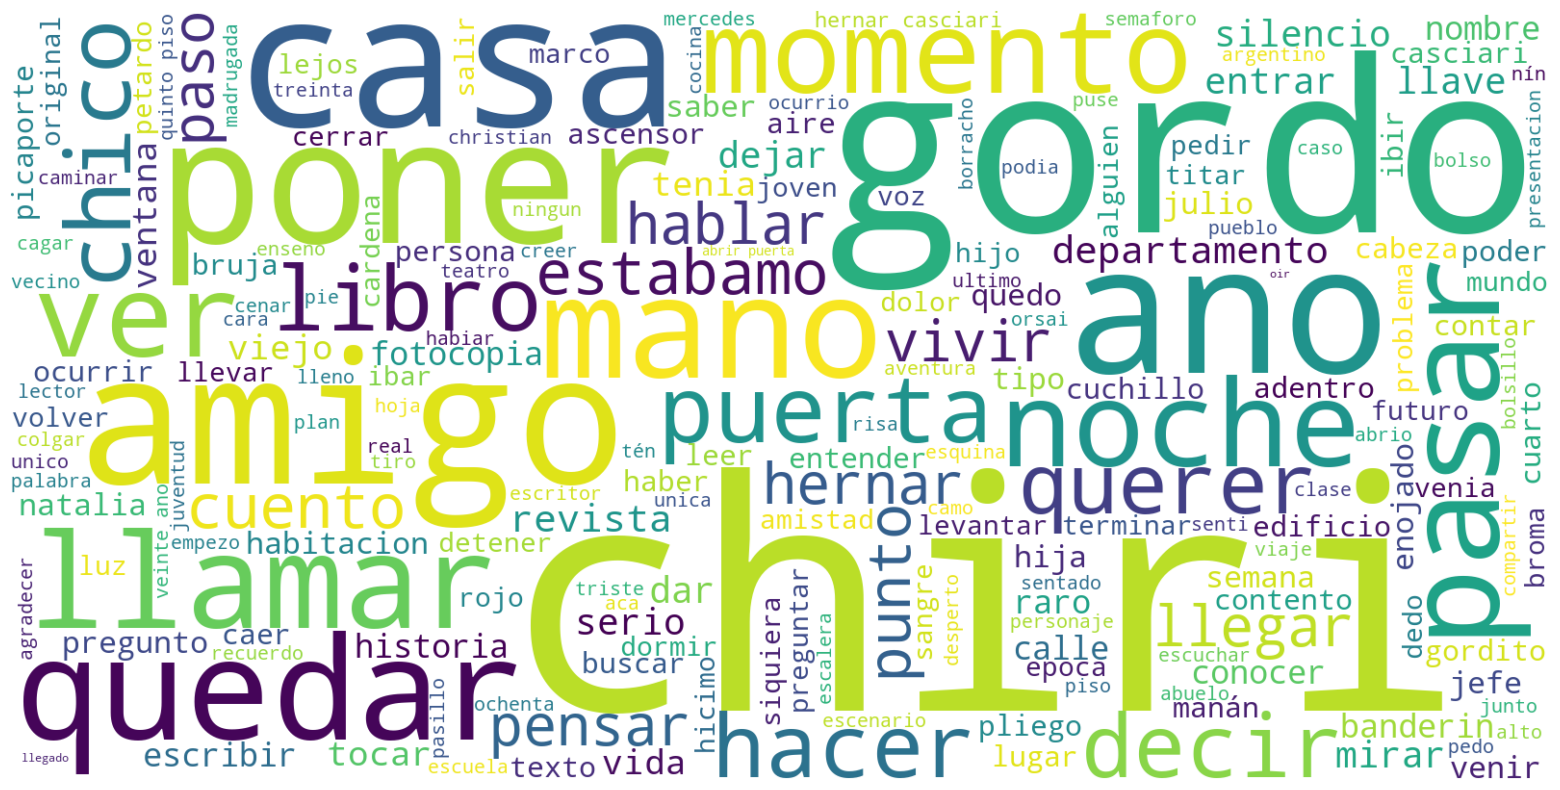

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cuentos_rec=df[df['titulo'].isin(recomendador("La venganza del metegol", cosine_sim = cosine_sim2))]

text = " ".join(cuentos_rec['cuento'])
text = text_cleaning(text)
text=' '.join(text)
text = Lematizador_propio(text)

wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

Entendiendo la correlación pearson como la medida de similitud solicitada para realizar las recomendaciones, lo que haremos inicialmente es tomar el texto vectorizado `TF-IDFVectorizer` anteriormente ya calculado en la matriz `tfidf_matrix` y calcularemos estas correlaciones titulo con titulo del dataframe original manteniendo el orden de su indice y guardaremos estos resultados en una lista llamada `correlations` la cual nos servirá como parametro para incorporarla en la misma formula ya desarrollada de `recomendador` y asi obtener nuevas recomendaciones basadas en esta nueva medida de similitud.   

In [62]:
from scipy.stats import pearsonr

# Crear una matriz vacía para almacenar las correlaciones lineales
correlations = []

# Iterar a través de los títulos
for idx in range(len(df)):
    # Calcular la correlación de Pearson entre el título actual y todos los demás títulos
    corr_values = []
    for j in range(len(df)):
        if j != idx:
            corr, _ = pearsonr(tfidf_matrix[idx].toarray()[0], tfidf_matrix[j].toarray()[0])
            corr_values.append(corr)
        else:
            corr_values.append(0.0)  # Establecer la correlación con uno mismo a 0
    correlations.append(corr_values)

Una vez ya habiendo calculado todas las correlaciones revisamos que efectivamente se guardaron los resultados de las correlaciones de pearson para todos los 520 cuentos.

In [75]:
print(correlations[0])
print(len(correlations))

[0.0, 0.04776383015405719, 0.11305967830043633, 0.06752980881498011, 0.046880290662318164, 0.0967377815873989, 0.08590417116071393, 0.03462894445859376, 0.06796927126034573, 0.08258202851848431, 0.06816700480850285, 0.05673814367949319, 0.08308462630453514, 0.03699223315035944, 0.08712457756507413, 0.09541277886354385, 0.06286217306459915, 0.1286780795037056, 0.07288370609345342, 0.06475205202733544, 0.06477485489140554, 0.04883194135258756, 0.048326977347557885, 0.02007294442663208, 0.04897082151773416, 0.02716226538554175, 0.01872182193004847, 0.03774503619637705, 0.0842870776384068, 0.027132391494203982, 0.013015614426613182, 0.011068291249192267, 0.01642408752933212, 0.03436034301239935, 0.03699086151646273, 0.026034104299136662, 0.011693117767387396, 0.02285916461401249, 0.032588485704403695, 0.08655805905522387, 0.02918980862026242, 0.017757011753876065, 0.02145724323812779, 0.027040138682557155, 0.013460152881121895, 0.022747817178771956, 0.08050567708749866, 0.02031141638048097

ya habiendo validado lo anterior lo que hacemos simplemente es tomar la formula desarrollada `recomedador` y remplazar en `cosine_sim` por `correlations` para que tome como nuevo parametro las correlaciones de cada cuento y así volvemos a tomar las 5 primeras recomendaciones organizadas de mayor a menor según este cálculo.

In [73]:
recomendador("La venganza del metegol", cosine_sim = correlations)

17     Cuento con bruja y tramontina
113        Los jefes y los empleados
140       La estrategia del banderín
14      Dice el Chiri, dice el Gordo
151               La foto de Wasmosy
Name: titulo, dtype: object

Evidentemente con los resultados anteriores podemos ver que cambian los resultados versus la similitud de coseno pues el primer cuento altamente correlacionado es `Cuento con bruja y tramontina` seguida de los `Los jefes y los empleados` y `La estrategia del banderín`;  pero se mantienen otras recomendaciones ya antes vistas como `Dice el Chiri, dice el Gordo` ya que con ambos criterios su similitud es indiscutible para el cuento analizado. En conclusión podemos decir que variar este tipo de criterios las recomendaciones para personas que hayan leido el cuento de `La venganza del metegol` ayudaría a recomendar cuentos diferentes.

##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [6]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir su procedimiento)